# **Account Validation Steps**

In [1]:
!pip install -q kaggle    # Install the Kaggle CLI

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Import Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model_results=[]

# **Download Dataset from Kaggle and Unzip it.**

In [36]:
!kaggle datasets download -d nelgiriyewithana/world-stock-prices-daily-updating

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating
License(s): other
world-stock-prices-daily-updating.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
#Unzipping the dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/world-stock-prices-daily-updating.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [38]:
df=pd.read_csv('/content/world-stock-prices-daily-updating.zip')

# **Data Visualization**

In [39]:
df

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains
0,2025-04-04 00:00:00-04:00,5.020000,5.290000,4.632000,5.030000,18752245.0,peloton,PTON,fitness,usa,0.0,0.0,NaN
1,2025-04-04 00:00:00-04:00,5.020000,5.290000,4.632000,5.030000,18775100.0,peloton,PTON,fitness,usa,0.0,0.0,NaN
2,2025-04-04 00:00:00-04:00,77.485001,78.269997,69.839996,76.889999,29602188.0,shopify,SHOP,e-commerce,canada,0.0,0.0,NaN
3,2025-04-04 00:00:00-04:00,955.000000,964.520020,914.498901,916.479980,5157203.0,costco,COST,retail,usa,0.0,0.0,NaN
4,2025-04-04 00:00:00-04:00,167.145004,178.143600,166.000000,171.000000,118861321.0,amazon,AMZN,e-commerce,usa,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306050,2000-01-03 00:00:00-05:00,7.534477,7.534477,7.363591,7.472337,490860.0,unilever,UL,consumer goods,netherlands,0.0,0.0,NaN
306051,2000-01-03 00:00:00-05:00,35.788786,36.844503,34.627498,36.263859,1734000.0,fedex,FDX,logistics,usa,0.0,0.0,NaN
306052,2000-01-03 00:00:00-05:00,34.729481,34.729481,32.934947,33.198849,6471267.0,american express,AXP,finance,usa,0.0,0.0,NaN
306053,2000-01-03 00:00:00-05:00,22.361069,22.431057,21.801168,22.186100,4520600.0,mcdonald's,MCD,food,usa,0.0,0.0,NaN


In [40]:
df.shape

(306055, 13)

In [41]:
#Count of null (NaN) values in each column
df.isnull().sum().sort_values(ascending=False)

,0
Capital Gains,306053
Open,0
High,0
Low,0
Date,0
Close,0
Volume,0
Ticker,0
Brand_Name,0
Industry_Tag,0


In [42]:
# Give summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306055 entries, 0 to 306054
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           306055 non-null  object 
 1   Open           306055 non-null  float64
 2   High           306055 non-null  float64
 3   Low            306055 non-null  float64
 4   Close          306055 non-null  float64
 5   Volume         306055 non-null  float64
 6   Brand_Name     306055 non-null  object 
 7   Ticker         306055 non-null  object 
 8   Industry_Tag   306055 non-null  object 
 9   Country        306055 non-null  object 
 10  Dividends      306055 non-null  float64
 11  Stock Splits   306055 non-null  float64
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 30.4+ MB


In [43]:
# This code calculates and sorts the percentage of missing values in each column
# of a DataFrame.
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
Capital Gains,99.999347
Open,0.000000
High,0.000000
Low,0.000000
Date,0.000000
Close,0.000000
Volume,0.000000
Ticker,0.000000
Brand_Name,0.000000
Industry_Tag,0.000000


### **Stock Price Over Time**

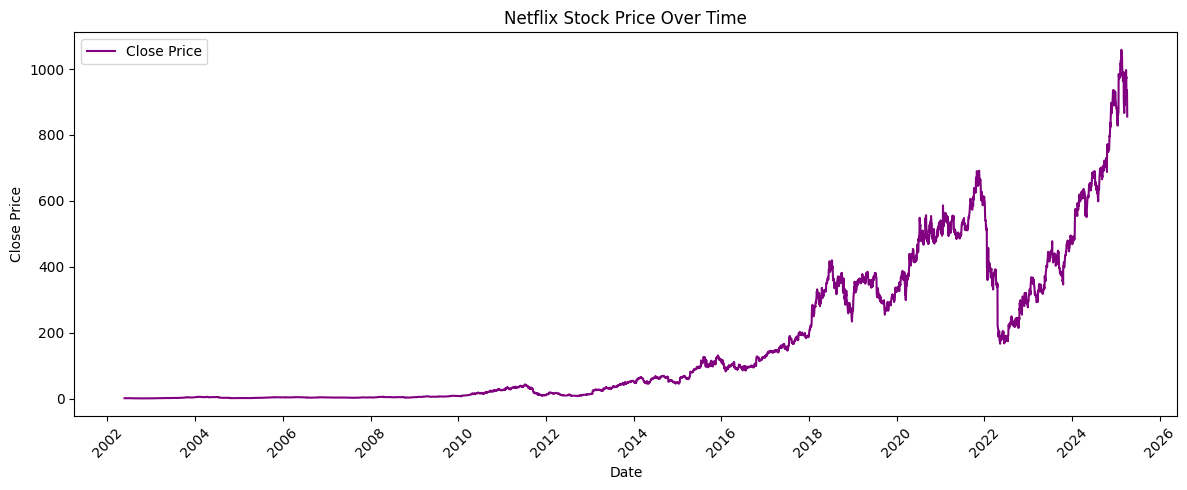

In [44]:
netflix = df[df['Brand_Name'].str.lower() == 'netflix'].copy()
netflix['Date'] = pd.to_datetime(netflix['Date'], utc=True)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(netflix['Date'], netflix['Close'], label='Close Price', color='purple')
plt.title('Netflix Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show x-axis ticks every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

### **Candlestick Chart**

In [45]:
amd_data = df[df['Ticker'] == 'AMD']

fig = go.Figure(data=[go.Candlestick(
    x=amd_data['Date'],
    open=amd_data['Open'],
    high=amd_data['High'],
    low=amd_data['Low'],
    close=amd_data['Close']
)])
fig.update_layout(title='AMD Stock Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

### **Volume Over Time**

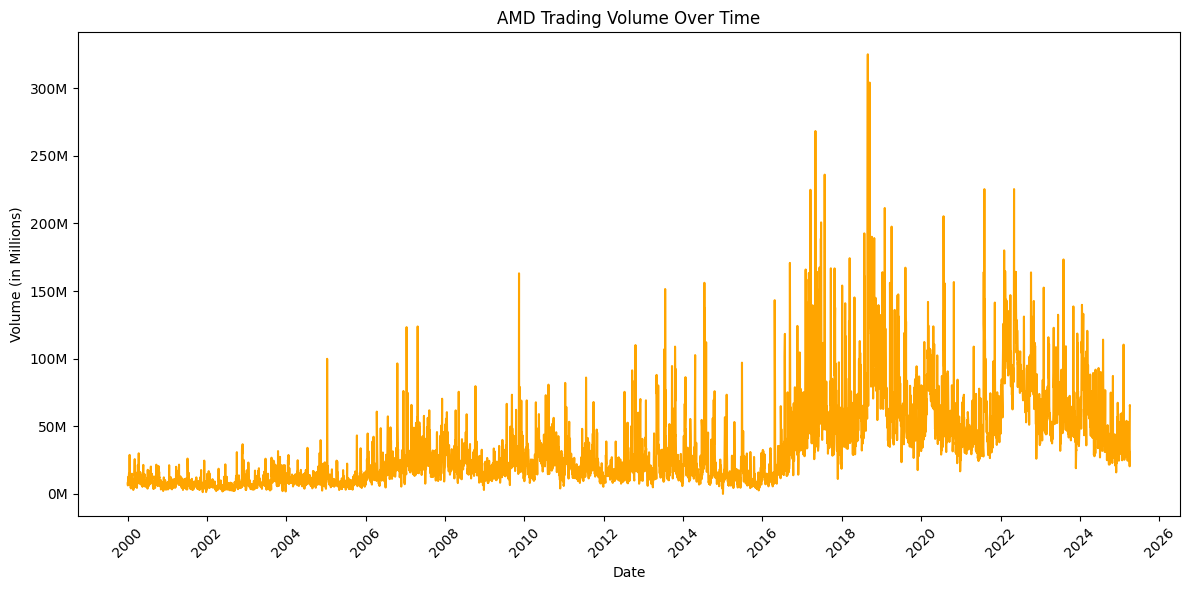

In [46]:
amd_data = df[df['Ticker'] == 'AMD'].copy()
amd_data['Date'] = pd.to_datetime(amd_data['Date'], utc=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(amd_data['Date'], amd_data['Volume'], color='orange')
plt.title('AMD Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in Millions)')

# Format x-axis to show year every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Format y-axis to show volume in millions (e.g., 50M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

plt.tight_layout()
plt.show()

### **Box Plot of Daily Close Prices for First 10 Stocks**

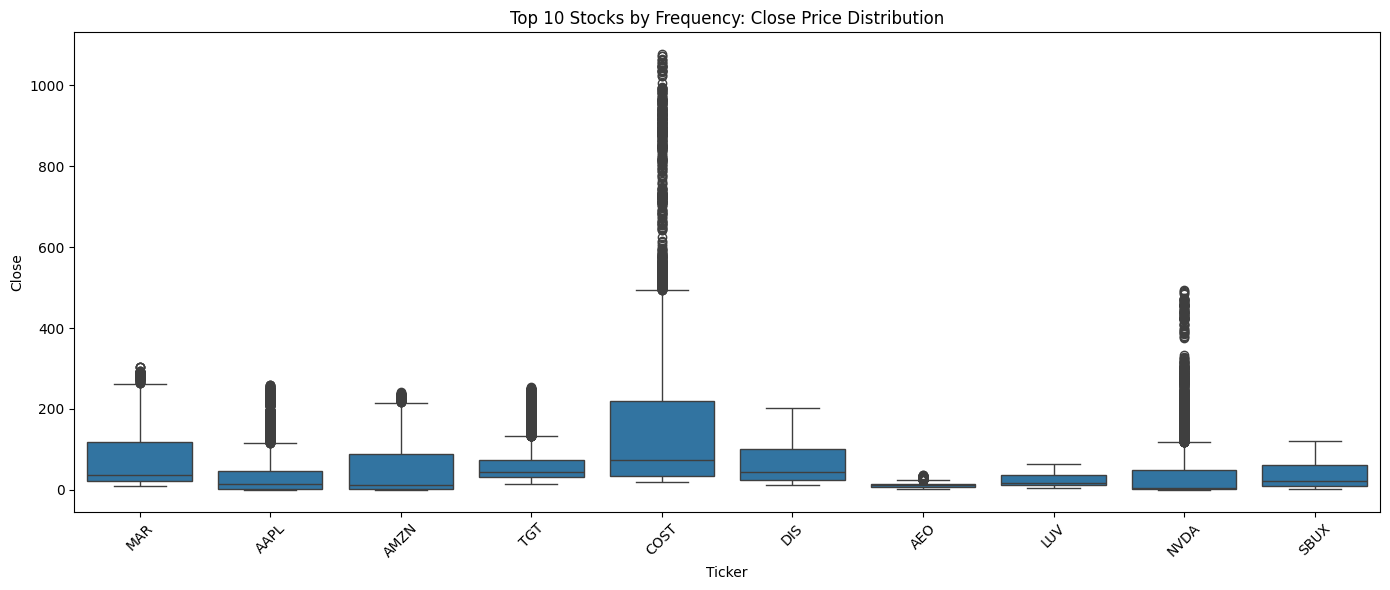

In [47]:
top10 = df['Ticker'].value_counts().nlargest(10)

df_top10 = df[df['Ticker'].isin(top10.index)].copy()

df_top10['Ticker'] = pd.Categorical(df_top10['Ticker'], categories=top10.index, ordered=True)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Ticker', y='Close', data=df_top10)
plt.title('Top 10 Stocks by Frequency: Close Price Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Average Closing Price by Industry**

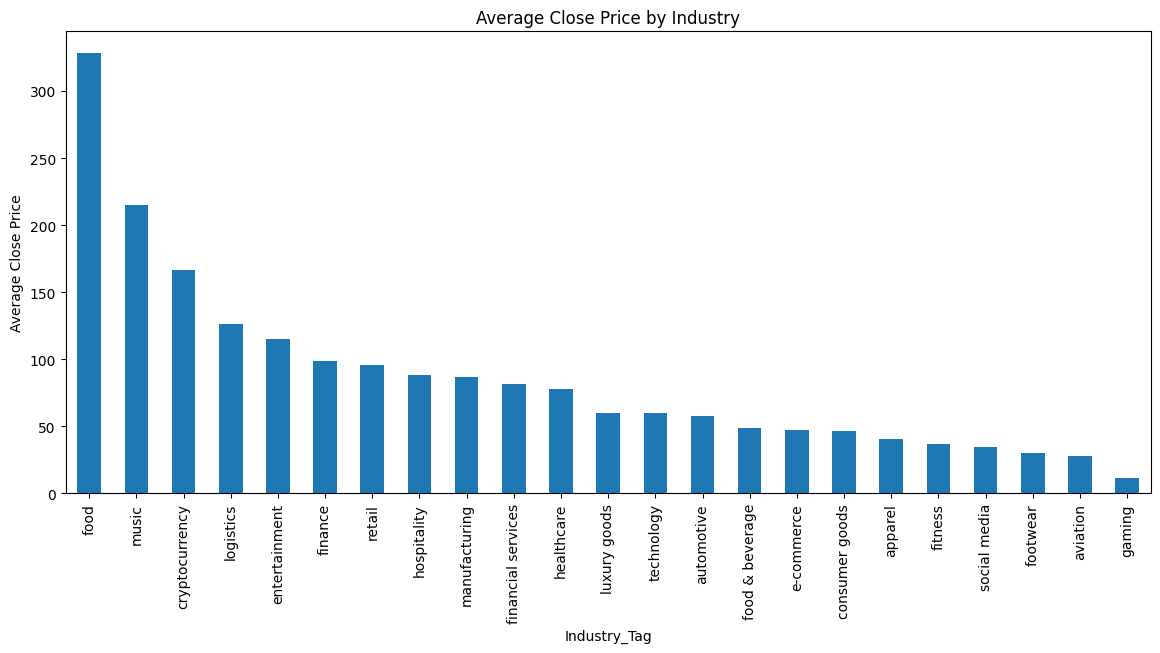

In [48]:
avg_close = df.groupby('Industry_Tag')['Close'].mean().sort_values(ascending=False)
avg_close.plot(kind='bar', figsize=(14,6), title='Average Close Price by Industry')
plt.ylabel('Average Close Price')
plt.show()

# **Preprocessing Steps**

In [49]:
duplicate_records = df[df.duplicated()]
print("Number of duplicate records:", len(duplicate_records))

Number of duplicate records: 0


In [50]:
df.isnull().all()

,0
Date,False
Open,False
High,False
Low,False
Close,False
Volume,False
Brand_Name,False
Ticker,False
Industry_Tag,False
Country,False


In [51]:
df.drop(columns=['Capital Gains', 'Date'], inplace=True)

In [52]:
df.shape

(306055, 11)

In [53]:
X = df.drop('Close', axis=1)
y = df['Close']

In [54]:
X

,Open,High,Low,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits
0,5.020000,5.290000,4.632000,18752245.0,peloton,PTON,fitness,usa,0.0,0.0
1,5.020000,5.290000,4.632000,18775100.0,peloton,PTON,fitness,usa,0.0,0.0
2,77.485001,78.269997,69.839996,29602188.0,shopify,SHOP,e-commerce,canada,0.0,0.0
3,955.000000,964.520020,914.498901,5157203.0,costco,COST,retail,usa,0.0,0.0
4,167.145004,178.143600,166.000000,118861321.0,amazon,AMZN,e-commerce,usa,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
306050,7.534477,7.534477,7.363591,490860.0,unilever,UL,consumer goods,netherlands,0.0,0.0
306051,35.788786,36.844503,34.627498,1734000.0,fedex,FDX,logistics,usa,0.0,0.0
306052,34.729481,34.729481,32.934947,6471267.0,american express,AXP,finance,usa,0.0,0.0
306053,22.361069,22.431057,21.801168,4520600.0,mcdonald's,MCD,food,usa,0.0,0.0


In [55]:
y

,Close
0,5.030000
1,5.030000
2,76.889999
3,916.479980
4,171.000000
...,...
306050,7.472337
306051,36.263859
306052,33.198849
306053,22.186100


### **One Hot Encoding**

In [56]:
X = pd.get_dummies(X, columns=['Brand_Name', 'Ticker', 'Industry_Tag', 'Country'], drop_first=True)

In [57]:
# X.T.duplicated().sum()  # This tells you how many columns are exact duplicates

In [58]:
X = X.loc[:, ~X.T.duplicated()]

### **Standard Scaler**

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [61]:
X

array([[-0.49965706, -0.49844561, -0.50193078, ..., -0.2587065 ,
        -0.20892108,  0.52255618],
       [-0.49965706, -0.49844561, -0.50193078, ..., -0.2587065 ,
        -0.20892108,  0.52255618],
       [ 0.01846759,  0.01780622, -0.03028819, ..., -0.2587065 ,
        -0.20892108, -1.91366985],
       ...,
       [-0.28723431, -0.29019422, -0.29721853, ..., -0.2587065 ,
        -0.20892108,  0.52255618],
       [-0.37566844, -0.37719181, -0.37774799, ..., -0.2587065 ,
        -0.20892108,  0.52255618],
       [-0.49456859, -0.49488055, -0.49617369, ..., -0.2587065 ,
        -0.20892108,  0.52255618]])

### **PCA**

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X = pca.fit_transform(X)

In [63]:
print(f"Original shape: {X.shape}")

Original shape: (306055, 50)


# **Train Test Split**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# **Linear Regression**

In [65]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred)

print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R² Score: {r2_linear}")

MAE: 14.950613180079127
MSE: 696.8441085750133
RMSE: 26.397804995397124
R² Score: 0.9624552396963207


In [67]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        70.667835
1     148.899994       197.312147
2      59.467102        46.515225
3      21.025333        35.038140
4      12.027976         9.222491
5       0.305036        -2.967698
6      20.888029        14.453137
7       5.329479        -0.424158
8      13.011365         7.552286
9     163.360001       160.242332
10     26.229353        27.214733
11     14.372452         2.918451
12      9.230000         1.644263
13     17.238571        61.425861
14     93.343742       113.904499
15     27.595345         6.882729
16     37.441280        29.794536
17    514.010010       632.806506
18    264.506500       245.551311
19     28.820000        22.405492


In [68]:
y_pred = linear_model.predict(X_test)
if not any(result['Model'] == 'Linear Regression' for result in model_results):
  model_results.append({
      'Model': 'Linear Regression',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

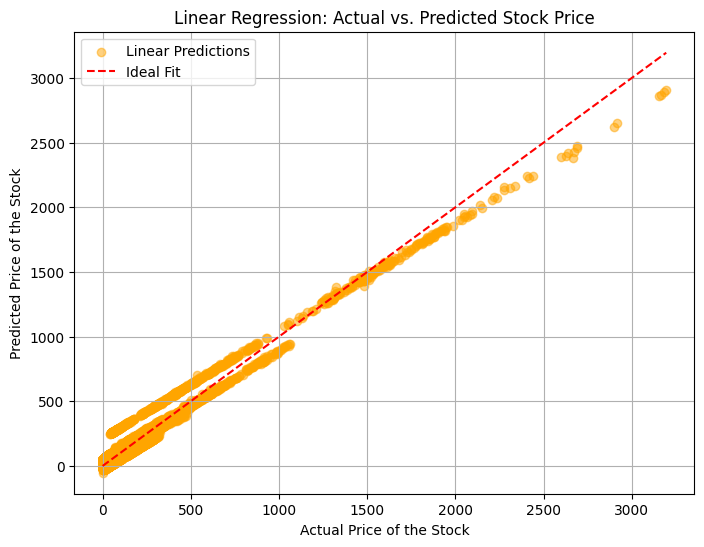

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.5, label='Linear Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Linear Regression: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
import pickle

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

# **Ridge**

In [71]:
from sklearn.linear_model import Ridge

In [72]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [73]:
y_pred = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred)

print(f"MAE: {mae_ridge}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R² Score: {r2_ridge}")

MAE: 14.950600474331248
MSE: 696.8437477214673
RMSE: 26.39779816048049
R² Score: 0.9624552591384883


In [74]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        70.667823
1     148.899994       197.311976
2      59.467102        46.515243
3      21.025333        35.038186
4      12.027976         9.222535
5       0.305036        -2.967664
6      20.888029        14.453193
7       5.329479        -0.424044
8      13.011365         7.552355
9     163.360001       160.242216
10     26.229353        27.214772
11     14.372452         2.918543
12      9.230000         1.644360
13     17.238571        61.425907
14     93.343742       113.904448
15     27.595345         6.882852
16     37.441280        29.794641
17    514.010010       632.805969
18    264.506500       245.551108
19     28.820000        22.405523


In [75]:
y_pred = ridge_model.predict(X_test)
if not any(result['Model'] == 'Ridge Regression' for result in model_results):
  model_results.append({
      'Model': 'Ridge Regression',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

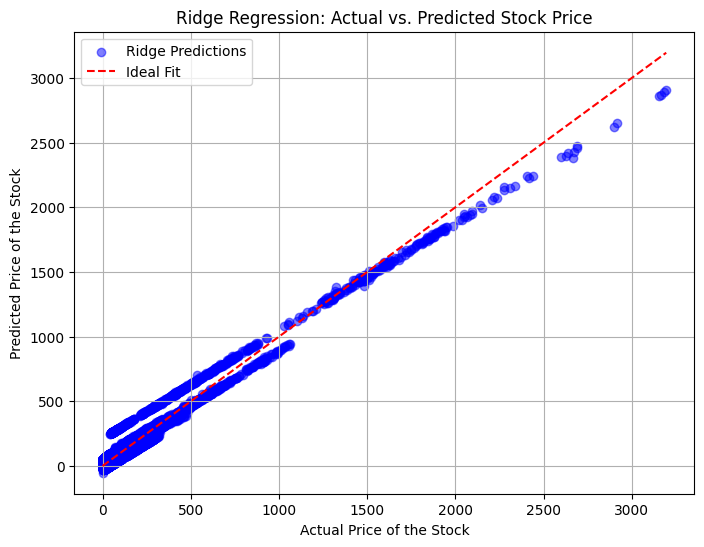

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Ridge Regression: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


In [77]:
import pickle

with open('ridge_regression_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)

# **Lasso**

In [78]:
from sklearn.linear_model import Lasso

In [79]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [80]:
y_pred = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred)

print(f"MAE: {mae_lasso}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R² Score: {r2_lasso}")

MAE: 14.867709398779784
MSE: 699.0610575099521
RMSE: 26.439762811151542
R² Score: 0.9623357943062493


In [81]:
y_pred = lasso_model.predict(X_test)
if not any(result['Model'] == 'Lasso Regression' for result in model_results):
  model_results.append({
      'Model': 'Lasso Regression',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [82]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        71.571314
1     148.899994       195.527542
2      59.467102        44.043219
3      21.025333        35.056899
4      12.027976        10.899500
5       0.305036       -10.339473
6      20.888029        13.416548
7       5.329479         0.685799
8      13.011365         5.569723
9     163.360001       160.111421
10     26.229353        28.965079
11     14.372452         4.087424
12      9.230000         3.449105
13     17.238571        63.329321
14     93.343742       112.786639
15     27.595345         9.546621
16     37.441280        32.019415
17    514.010010       629.991489
18    264.506500       244.482837
19     28.820000        23.759237


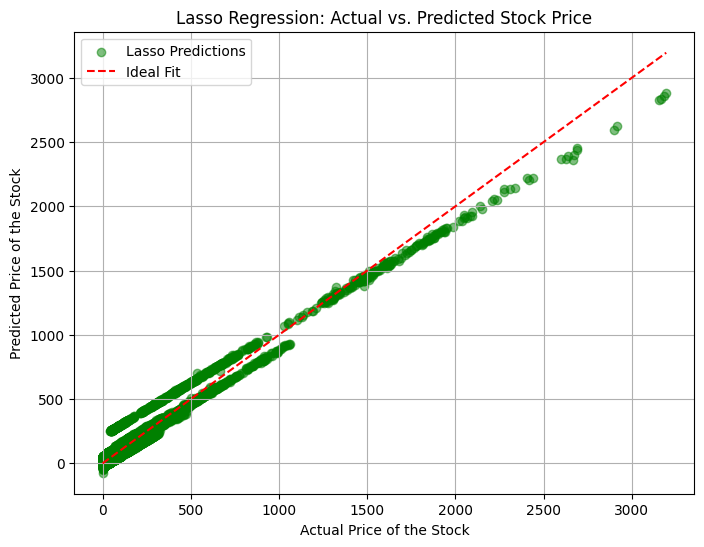

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Lasso Regression: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [84]:
import pickle

with open('lasso_regression_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

# **Decision Tree Rrgressor**

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
decision_tree=DecisionTreeRegressor(random_state=99)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=99)

In [87]:
y_pred = decision_tree.predict(X_test)
mae_decision_tree = mean_absolute_error(y_test, y_pred)
mse_decision_tree = mean_squared_error(y_test, y_pred)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred)


print(f"MAE: {mae_decision_tree}")
print(f"MSE: {mse_decision_tree}")
print(f"RMSE: {rmse_decision_tree}")
print(f"R² Score: {r2_decision_tree}")

MAE: 0.7205235030976394
MSE: 5.307878504516021
RMSE: 2.30388335306196
R² Score: 0.9997140206486346


In [88]:
y_pred = decision_tree.predict(X_test)
if not any(result['Model'] == 'Decision Tree' for result in model_results):
  model_results.append({
      'Model': 'Decision Tree',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [89]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        25.200001
1     148.899994       150.130005
2      59.467102        60.083790
3      21.025333        21.722668
4      12.027976        11.959044
5       0.305036         0.448346
6      20.888029        20.941704
7       5.329479         5.332446
8      13.011365        13.011365
9     163.360001       163.509995
10     26.229353        26.229353
11     14.372452        14.282232
12      9.230000         9.290000
13     17.238571        17.274286
14     93.343742        94.848427
15     27.595345        27.934944
16     37.441280        37.951996
17    514.010010       506.630005
18    264.506500       261.707123
19     28.820000        29.048607


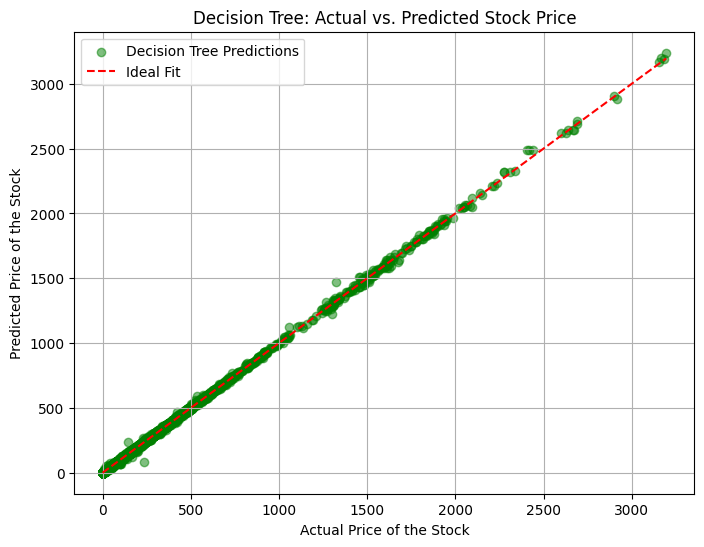

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Decision Tree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Decision Tree: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [91]:
import pickle

with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree, f)

# **Random Forest Regressor**

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
random_forest=RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, n_jobs=-1, random_state=99)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_jobs=-1,
                      random_state=99)

In [94]:
y_pred = random_forest.predict(X_test)
mae_random_forest = mean_absolute_error(y_test, y_pred)
mse_random_forest = mean_squared_error(y_test, y_pred)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred)


print(f"MAE: {mae_random_forest}")
print(f"MSE: {mse_random_forest}")
print(f"RMSE: {rmse_random_forest}")
print(f"R² Score: {r2_random_forest}")

MAE: 6.6587197825537565
MSE: 95.6641259554865
RMSE: 9.780803952410379
R² Score: 0.994845781668436


In [95]:
y_pred = random_forest.predict(X_test)
if not any(result['Model'] == 'Random Forest' for result in model_results):
  model_results.append({
      'Model': 'Random Forest',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [96]:
# Print a comparison of actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

# Show top 10 rows
print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        40.763863
1     148.899994       144.428172
2      59.467102        47.753852
3      21.025333        28.289532
4      12.027976        13.518430
5       0.305036         6.804720
6      20.888029        11.801713
7       5.329479        11.593713
8      13.011365        14.773128
9     163.360001       167.683350
10     26.229353        29.386676
11     14.372452        13.874715
12      9.230000        13.759451
13     17.238571        15.599666
14     93.343742        94.432765
15     27.595345        19.934779
16     37.441280        34.786096
17    514.010010       510.195668
18    264.506500       261.825953
19     28.820000        26.510550


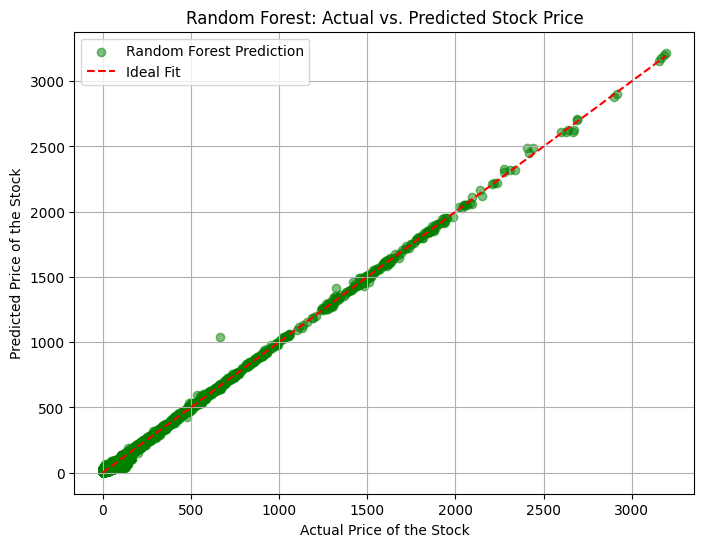

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Random Forest Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('Random Forest: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [98]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

# **XGBoost Regressor**

In [99]:
from xgboost import XGBRegressor

In [100]:
xgboost_model = XGBRegressor(n_estimators=1000, early_stopping_rounds=10)
xgboost_model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          verbose=True)

[0]	validation_0-rmse:97.31690
[1]	validation_0-rmse:70.02296
[2]	validation_0-rmse:50.72600
[3]	validation_0-rmse:36.98005
[4]	validation_0-rmse:27.50705
[5]	validation_0-rmse:20.74641
[6]	validation_0-rmse:16.08140
[7]	validation_0-rmse:13.30426
[8]	validation_0-rmse:11.21505
[9]	validation_0-rmse:9.70025
[10]	validation_0-rmse:8.83527
[11]	validation_0-rmse:8.22646
[12]	validation_0-rmse:7.43077
[13]	validation_0-rmse:7.12158
[14]	validation_0-rmse:6.69670
[15]	validation_0-rmse:6.34524
[16]	validation_0-rmse:6.19373
[17]	validation_0-rmse:5.93865
[18]	validation_0-rmse:5.83151
[19]	validation_0-rmse:5.55417
[20]	validation_0-rmse:5.47625
[21]	validation_0-rmse:5.40592
[22]	validation_0-rmse:5.30515
[23]	validation_0-rmse:5.25365
[24]	validation_0-rmse:5.17306
[25]	validation_0-rmse:5.08423
[26]	validation_0-rmse:5.05462
[27]	validation_0-rmse:4.99721
[28]	validation_0-rmse:4.94975
[29]	validation_0-rmse:4.78683
[30]	validation_0-rmse:4.71178
[31]	validation_0-rmse:4.66363
[32]	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred = xgboost_model.predict(X_test)
mae_xgboost = mean_absolute_error(y_test, y_pred)
mse_xgboost = mean_squared_error(y_test, y_pred)
rmse_xgboost = np.sqrt(mse_xgboost)
r2_xgboost = r2_score(y_test, y_pred)


print(f"MAE: {mae_xgboost}")
print(f"MSE: {mse_xgboost}")
print(f"RMSE: {rmse_xgboost}")
print(f"R² Score: {r2_xgboost}")

MAE: 0.8382758243865807
MSE: 4.180880653747067
RMSE: 2.044720189597361
R² Score: 0.9997747413516572


In [102]:
y_pred = xgboost_model.predict(X_test)
if not any(result['Model'] == 'XGBoost' for result in model_results):
  model_results.append({
      'Model': 'XGBoost',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [103]:
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        25.207232
1     148.899994       148.350571
2      59.467102        59.345909
3      21.025333        21.380663
4      12.027976        11.640434
5       0.305036         1.383941
6      20.888029        21.309509
7       5.329479         4.988818
8      13.011365        12.608274
9     163.360001       164.633347
10     26.229353        26.027088
11     14.372452        13.948703
12      9.230000         8.716395
13     17.238571        15.527375
14     93.343742        93.503471
15     27.595345        27.972799
16     37.441280        37.142239
17    514.010010       510.405701
18    264.506500       261.800659
19     28.820000        28.708994


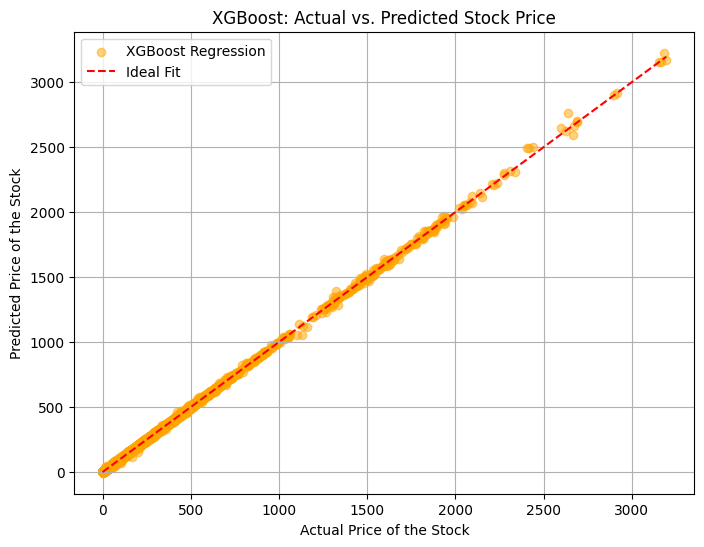

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange', label='XGBoost Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('XGBoost: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [105]:
import pickle

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgboost_model, f)

# **Support Vector Regression**

In [106]:
from sklearn.svm import LinearSVR

In [107]:
svr_model=LinearSVR()
svr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR()

In [108]:
y_pred = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred)
mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred)


print(f"MAE: {mae_svr}")
print(f"MSE: {mse_svr}")
print(f"RMSE: {rmse_svr}")
print(f"R² Score: {r2_svr}")

MAE: 8.245842576984355
MSE: 2385.39757253729
RMSE: 48.84053206648439
R² Score: 0.8714788874759497


In [109]:
y_pred = svr_model.predict(X_test)
if not any(result['Model'] == 'Support Vector Regressor' for result in model_results):
  model_results.append({
      'Model': 'Support Vector Regressor',
      'MAE': mean_absolute_error(y_test, y_pred),
      'MSE': mean_squared_error(y_test, y_pred),
      'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
      'R² Score': r2_score(y_test, y_pred)
      })

In [110]:
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price':y_pred})

print(comparison_df.head(20))

    Actual Price  Predicted Price
0      24.639999        25.203245
1     148.899994       218.442751
2      59.467102        59.233061
3      21.025333        20.271187
4      12.027976        12.160484
5       0.305036        -5.989584
6      20.888029        20.703803
7       5.329479         5.283729
8      13.011365        13.047224
9     163.360001       162.299911
10     26.229353        26.210927
11     14.372452        13.928211
12      9.230000         9.052294
13     17.238571        17.684132
14     93.343742        94.960936
15     27.595345        27.734322
16     37.441280        37.868643
17    514.010010       880.994859
18    264.506500       262.598380
19     28.820000        28.850170


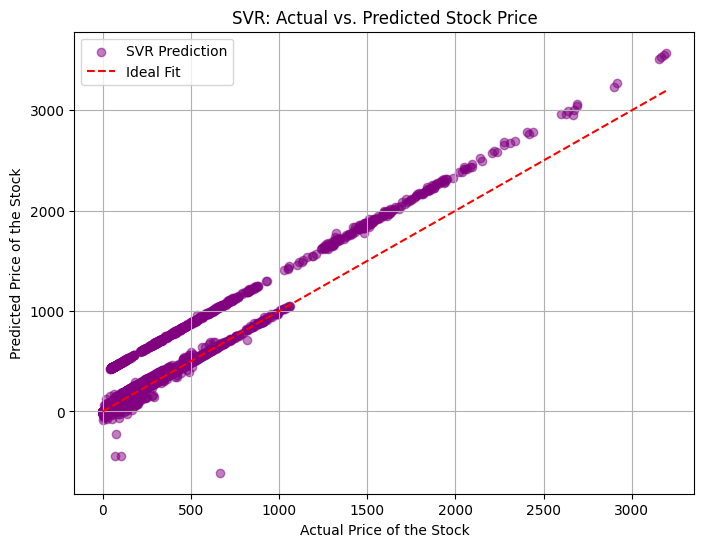

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple', label='SVR Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price of the Stock')
plt.ylabel('Predicted Price of the Stock')
plt.title('SVR: Actual vs. Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [112]:
import pickle

with open('support_vector_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)

# **Side by Side Comparison**

In [113]:
pd.DataFrame(model_results)

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,14.950613,696.844109,26.397805,0.962455
1,Ridge Regression,14.950600,696.843748,26.397798,0.962455
2,Lasso Regression,14.867709,699.061058,26.439763,0.962336
3,Decision Tree,0.720524,5.307879,2.303883,0.999714
4,Random Forest,6.658720,95.664126,9.780804,0.994846
5,XGBoost,0.838276,4.180881,2.044720,0.999775
6,Support Vector Regressor,8.245843,2385.397573,48.840532,0.871479
